# Comparison of the different methods

## Linear SVM vs. RFF

### Tiny - Set

Finished in 0:00:00.039892
Finished in 0:00:00.027946


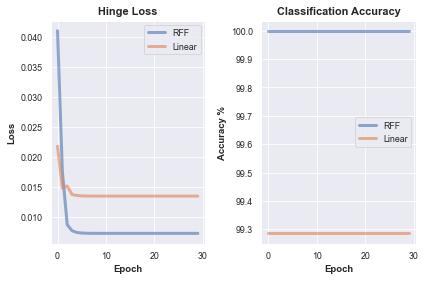

In [37]:
from DataLoader import *
from LinearSVM import *
from RFF import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

rff = RFF(n_components=100, sigma=1)
rff.fit(xtrain)
xtrain_rff, xtest_rff = rff.transform(xtrain), rff.transform(xtest)

# best hyperparameters RFF
lr = 3; C = 0.01; batch_size=10
svm_rff = LinearSVM(learning_rate=lr, regularization=C, batch_size=batch_size, collect_data=True)
svm_rff.fit(xtrain_rff, ytrain)

# best hyperparameters Linear SVM
lr = 1; C = 0.001; batch_size=10
svm_lin = LinearSVM(learning_rate=lr, regularization=C, batch_size=batch_size, collect_data=True)
svm_lin.fit(xtrain, ytrain)

# Convergence Plots
plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm_rff.losses, lw=3, alpha=0.6, label="RFF")
plt.plot(svm_lin.losses, lw=3, alpha=0.6, label="Linear")
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")
plt.legend()

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm_rff.accuracies * 100, lw=3, alpha=0.6, label="RFF")
plt.plot(svm_lin.accuracies * 100, lw=3, alpha=0.6, label="Linear")
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
plt.legend()

plt.tight_layout()
plt.show()

### Large - Set

Finished in 0:00:09.573389
Finished in 0:00:08.643549


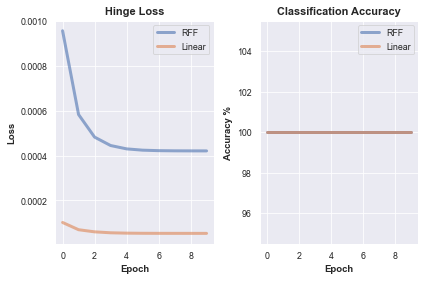

In [41]:
from DataLoader import *
from LinearSVM import *
from RFF import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

rff = RFF(n_components=250, sigma=1)
rff.fit(xtrain)
xtrain_rff, xtest_rff = rff.transform(xtrain), rff.transform(xtest)

# best hyperparameters RFF
lr = 0.1; C = 0.001; batch_size=50
svm_rff = LinearSVM(learning_rate=lr, regularization=C, batch_size=batch_size, collect_data=True, epoch_count=10)
svm_rff.fit(xtrain_rff, ytrain)

# best hyperparameters Linear SVM
lr = 0.1; C = 0.001; batch_size=50
svm_lin = LinearSVM(learning_rate=lr, regularization=C, batch_size=batch_size, collect_data=True, epoch_count=10)
svm_lin.fit(xtrain, ytrain)

# Convergence Plots
plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm_rff.losses, lw=3, alpha=0.6, label="RFF")
plt.plot(svm_lin.losses, lw=3, alpha=0.6, label="Linear")
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")
plt.legend()

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm_rff.accuracies * 100, lw=3, alpha=0.6, label="RFF")
plt.plot(svm_lin.accuracies * 100, lw=3, alpha=0.6, label="Linear")
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
plt.legend()

plt.tight_layout()
plt.show()

### MNIST - Set

100%|██████████| 3/3 [03:03<00:00, 61.11s/it]


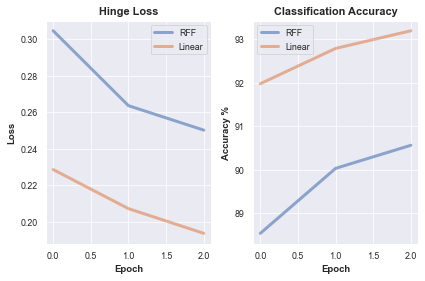

In [44]:
from DataLoader import *
from MultiClassSVM import *
from RFF import *
import matplotlib.pyplot as plt 

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()

rff = RFF(n_components=600, sigma=20)
rff.fit(xtrain)
xtrain_rff, xtest_rff = rff.transform(xtrain), rff.transform(xtest)

# best hyperparameters RFF
lr = 3; C = 1; batch_size=100
mc_rff = MultiClassSVM(lr=lr, C=C, batch_size=batch_size, max_iters=3, tqdm_toggle=True)
mc_rff.fit(xtrain_rff, ytrain)

# best hyperparameters Linear SVM
lr = 0.1; C = 0.01; batch_size=200
mc_lin = MultiClassSVM(lr=lr, C=C, batch_size=batch_size, max_iters=3, tqdm_toggle=True)
mc_lin.fit(xtrain, ytrain)

# Convergence Plots
plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(mc_rff.losses, lw=3, alpha=0.6, label="RFF")
plt.plot(mc_lin.losses, lw=3, alpha=0.6, label="Linear")
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")
plt.legend()

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(mc_rff.accuracies * 100, lw=3, alpha=0.6, label="RFF")
plt.plot(mc_lin.accuracies * 100, lw=3, alpha=0.6, label="Linear")
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
plt.legend()

plt.tight_layout()
plt.show()

## Serial vs. parallel SVM

### Tiny - Set

In [45]:
from DataLoader import *
from LinearSVM import *
from RFF import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

# best hyperparameters Linear SVM
lr = 1; C = 0.001; batch_size=10
svm_serial = LinearSVM(learning_rate=lr, regularization=C, batch_size=batch_size, collect_data=True, thread_count=1, epoch_count=1)
svm_serial.fit(xtrain, ytrain)

# best hyperparameters Linear SVM
lr = 1; C = 0.001; batch_size=10
svm_par = LinearSVM(learning_rate=lr, regularization=C,  collect_data=True, thread_count=4, epoch_count=1)
svm_par.fit(xtrain, ytrain)

print(f"Accuracy serial SVM: {svm_serial.accuracies}")
print(f"Accuracy parallel SVM: {svm_par.accuracies}")


Finished in 0:00:00.001995
Using parallel gradient descent
Examples per thread: 35
Finished in 0:00:00.005985
Accuracy serial SVM: [0.99285714]
Accuracy parallel SVM: {0: [0.9785714285714285, 1.0, 1.0], 1: [0.7357142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858], 2: [0.4785714285714286, 0.9071428571428571, 0.9857142857142858, 0.9857142857142858], 3: [0.4714285714285714, 0.8642857142857143, 0.8642857142857143, 0.9357142857142857, 0.9357142857142857]}
